In [6]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

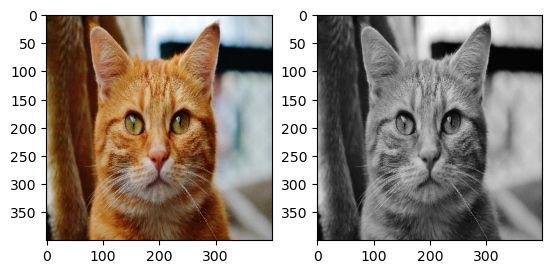

(2850, 4286, 3) (400, 400, 3) (400, 400)


In [7]:
image_cat = cv2.imread("./data/cat.jpg")
image_cat = cv2.cvtColor(image_cat, cv2.COLOR_BGR2RGB)
img = cv2.resize(image_cat, (400,400))
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig = plt.figure()
#print(plt.cm.get_cmap().name)
ax1 = fig.add_subplot(1,2,1 )
ax1.imshow(img, plt.cm.viridis)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_gray, plt.cm.gray)
plt.show()
print(image_cat.shape,img.shape, img_gray.shape)

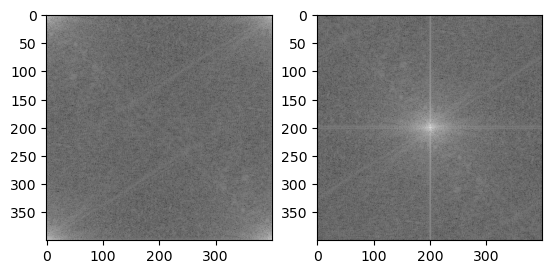

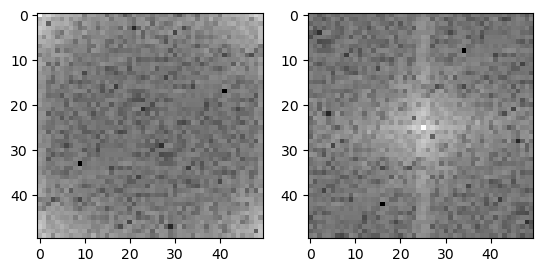

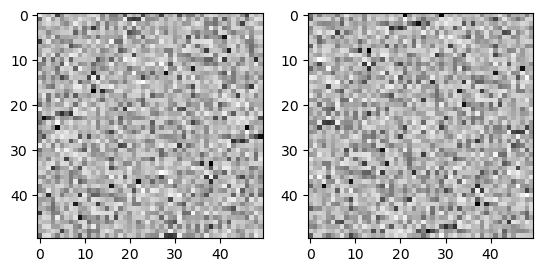

In [8]:
#二维fft并中心化
def visualize_img_fft(img_gray):
    fft_w = np.fft.fft2(img_gray)
    fft_shift = np.fft.fftshift(fft_w)
    log_magnitude_w = 20 * np.log(np.abs(fft_w))
    log_magnitude_shift = 20 * np.log(np.abs(fft_shift))
    fig = plt.figure()
    #print(plt.cm.get_cmap().name)
    ax1 = fig.add_subplot(1,2,1 )
    ax1.imshow(log_magnitude_w, plt.cm.gray)
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(log_magnitude_shift, plt.cm.gray)
    #Splt.colorbar()
    plt.show()
img_gray_100 = cv2.resize(img_gray, (50,50))
visualize_img_fft(img_gray)
visualize_img_fft(img_gray_100)

#噪音的fft
noise = np.random.randn(50,50)
visualize_img_fft(noise)

In [9]:

threshold = 20
mask = np.zeros_like(fft_shift)
shape = fft_shift.shape
x_center = int(shape[0]/2)
y_center = int(shape[1]/2)
mask[x_center - threshold: x_center + threshold,y_center - threshold: y_center + threshold] = 1
fft_shift_filtered = mask * fft_shift
ifft_shift_filtered = np.fft.ifftshift(fft_shift_filtered)
filtered_image = np.fft.ifft2(ifft_shift_filtered)
filtered_image = np.abs(filtered_image).astype(np.uint8)

high_mask = np.zeros_like(fft_shift)
high_mask[threshold: shape[0]- threshold, threshold: shape[1] - threshold] = 1
high_fft = high_mask * fft_w
high_image = np.fft.ifft2(high_fft)
high_image = np.abs(high_image).astype(np.uint8)
fig = plt.figure(figsize=(10,30))
#print(plt.cm.get_cmap().name)
ax1 = fig.add_subplot(1,3,1 )
ax1.imshow(img_gray, plt.cm.gray)
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(filtered_image, plt.cm.gray)
ax2 = fig.add_subplot(1,3,3)
ax2.imshow(high_image, plt.cm.gray)
#Splt.colorbar()
plt.show()

NameError: name 'fft_shift' is not defined

In [ ]:
# fft check
N = 10
x = np.linspace(0, np.pi*2, N)

y = np.sin(x) + np.sin(4*x)
fft_w = np.fft.fft(y)
X = np.zeros_like(fft_w)
n = np.array(range(N))
for k in range(N):
    X[k] = np.sum(y * np.exp(- 2j * np.pi * k * n /N))

print(np.sum(np.abs(fft_w - X)))


1.9805530398440564e-14


In [11]:
def get_continous_freqs_data(device = torch.device('cpu')):
    N = 384 //2
    x = torch.linspace(-10, 10,  N)
    duration =20//2
    #y = torch.from_numpy((np.array(range(N)) / duration).astype(np.int32) % 3 -1).to(torch.float)
    y = torch.ones_like(x)
    i = 2
    while(i < N):
        y[i: min(max(i,i+ 1 * duration), N)] = 0
        y[min(max(i,i+ 1 * duration), N): min(max(i,i+ 3 * duration), N) ] = -1
        y[min(max(i,i+ 3 * duration), N): min(max(i,i+ 4 * duration), N) ] = 0
        y[min(max(i,i+ 4 * duration), N): min(max(i,i+ 6 * duration), N) ] = 1
        i += 6 * duration

    return x.to(device), y.to(device)



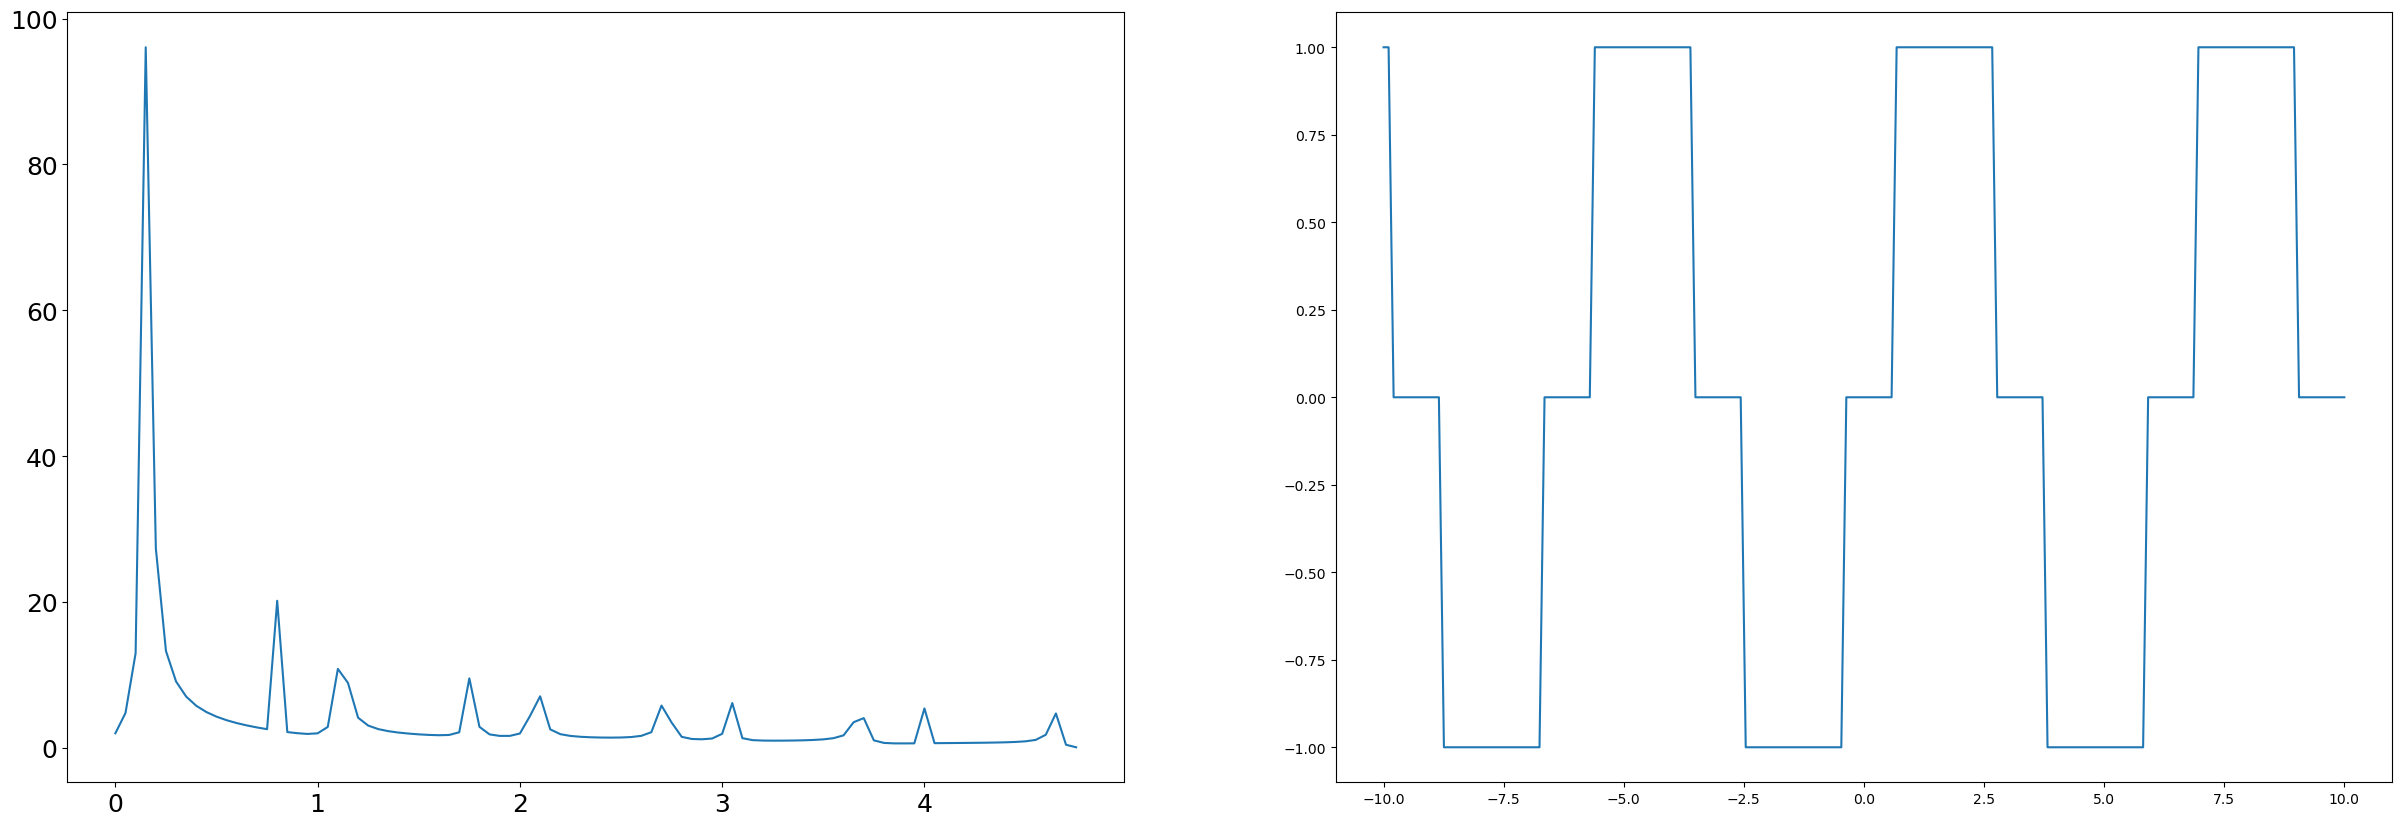

In [12]:

x,y = get_continous_freqs_data()
x = x.cpu().numpy()
y = y.cpu().numpy()
"""
N = 100
T = 20
x = np.linspace(0, T,  N , endpoint = False)
y = np.sin( 2 * np.pi *x)
"""
def visualize_f_and_fft(x, y):
    N = x.shape[0]
    T = x[-1] - x[0]
    fft_w = np.fft.fft(y)
    #fft_w = np.fft.fftshift(fft_w)
    freqs = np.fft.fftfreq(N, T/N)
    maglitude = np.abs(fft_w)
    fig = plt.figure(figsize=(30,10))
    ax1 = fig.add_subplot(1,2,1)
    left_freqs = int(N/2)
    ax1.tick_params(labelsize=18)
    ax1.plot(freqs[:left_freqs], maglitude[:left_freqs])
    ax2 = fig.add_subplot(1, 2,2)
    ax2.plot(x, y)
    plt.show()

visualize_f_and_fft(x,y)


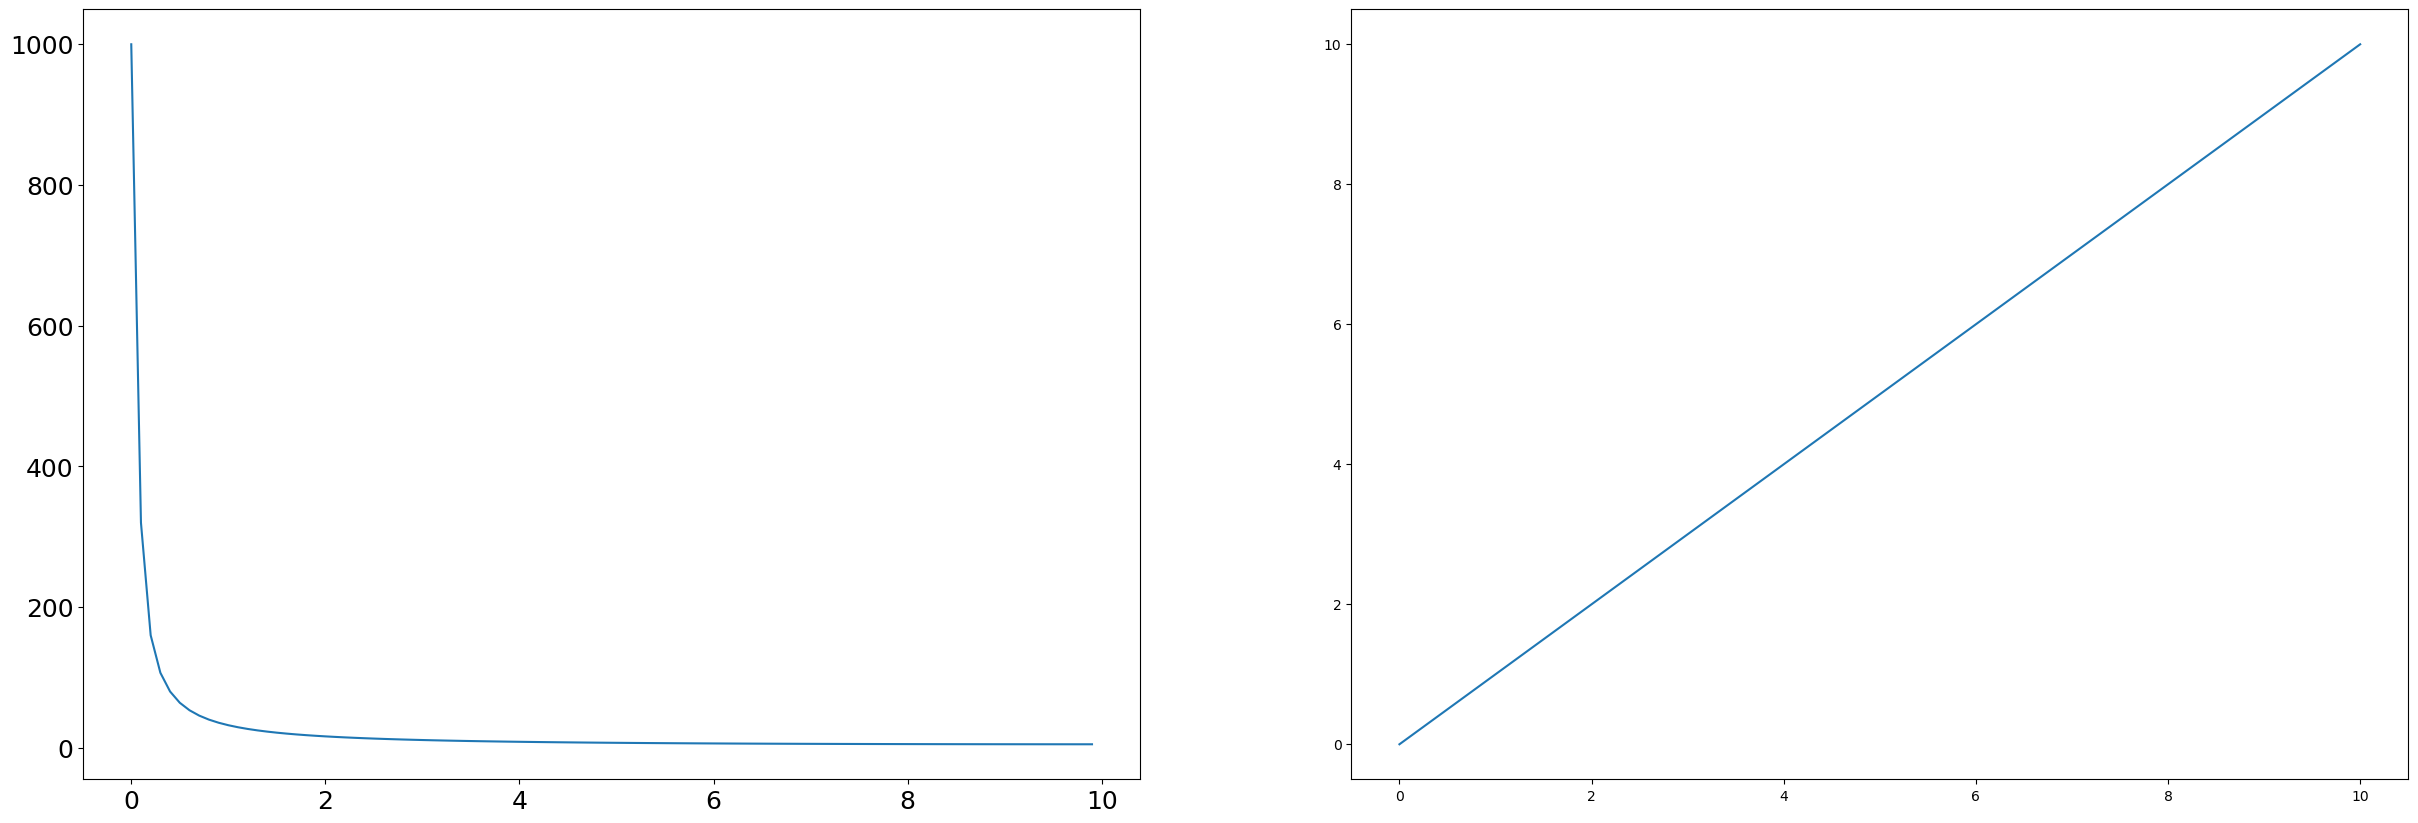

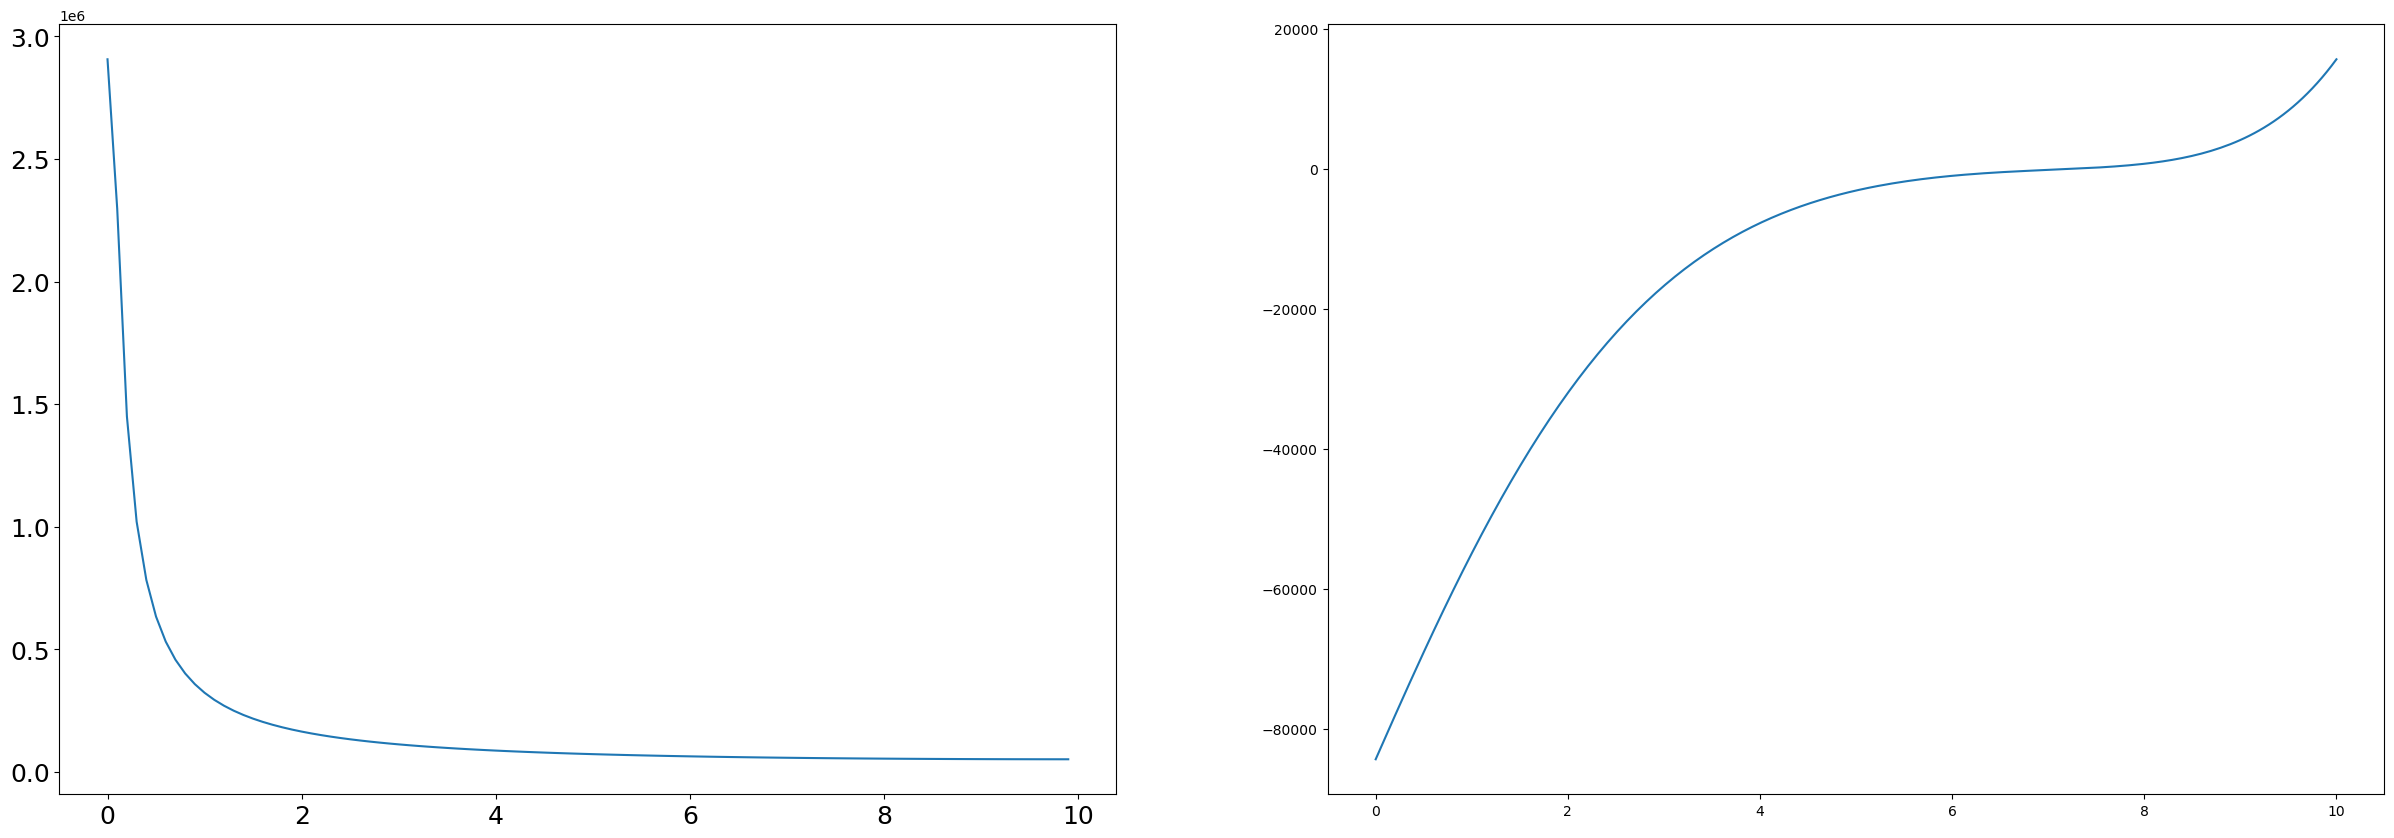

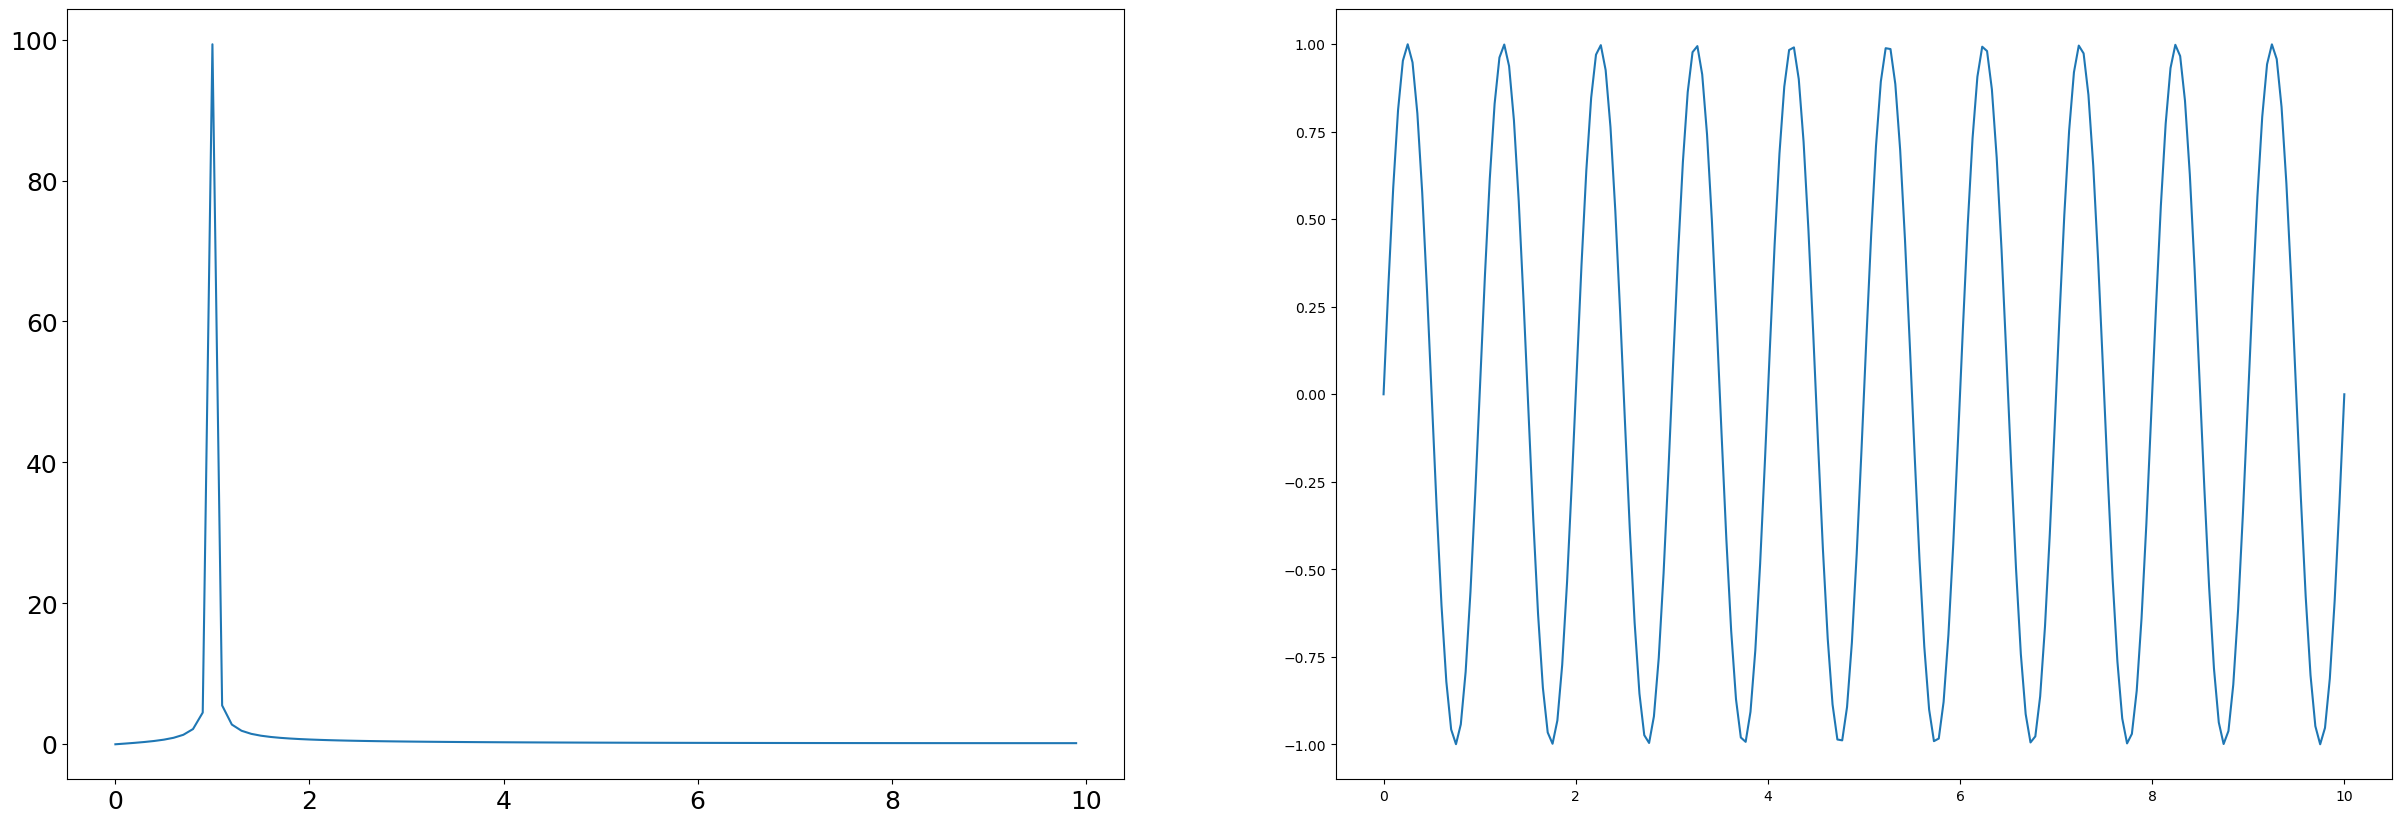

In [26]:
x = np.linspace(0, 10, 200)
y1 = x
y2 = (x-5) ** 6 + (x-10) **5
y3 = np.sin(2* np.pi *x)
visualize_f_and_fft(x,y1)
visualize_f_and_fft(x, y2)
visualize_f_and_fft(x, y3)

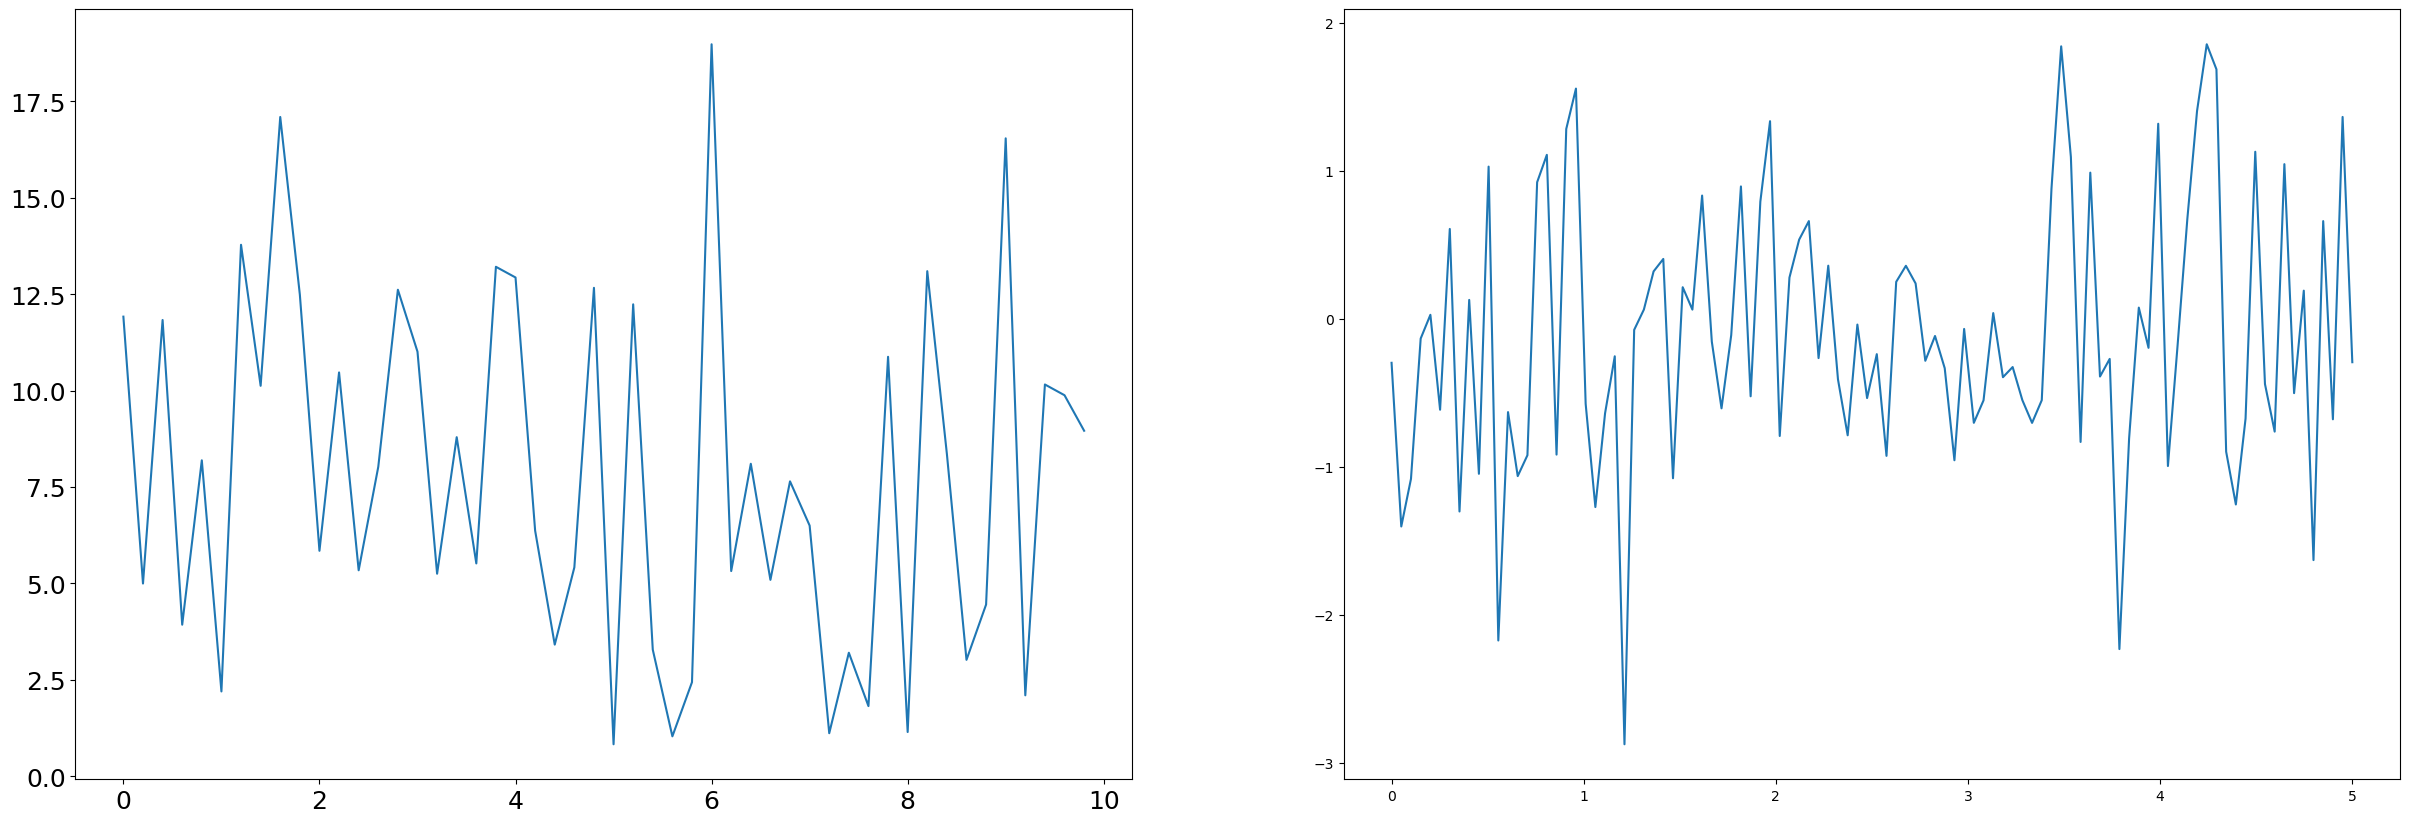

In [13]:
x = np.linspace(0, 5,100)
y = np.random.randn(100)
visualize_f_and_fft(x,y)